<a href="https://colab.research.google.com/github/igoramaralms/Syphilis-CaseStudy-Brazil-ML/blob/main/syphilis_cases_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Importing session

#### 1.1 Importing Libs

In [ ]:
#%pip install pandas
#%pip install matplotlib
#%pip install seaborn

#%pip install imbalanced-learn
#%pip install scikit-learn

#%pip install xgboost
#%pip install catboost

#%pip install joblib

In [24]:
#base
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Classification
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from scipy.stats import randint
from sklearn.model_selection import KFold, cross_val_score


from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier


# Regression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor



In [25]:
df = pd.read_csv("data_set.csv")

# 2.0 EDA

In [ ]:
df.head()

VDRL_RESULT  CONS_ALCOHOL  RH_FACTOR  SMOKER  PLAN_PREGNANCY  BLOOD_GROUP  \
0          1.0           1.0        0.0     1.0             1.0          1.0   
1          1.0           1.0        0.0     1.0             1.0          0.0   
2          1.0           1.0        2.0     1.0             1.0          4.0   
3          1.0           1.0        2.0     1.0             0.0          4.0   
4          1.0           1.0        0.0     1.0             1.0          1.0   

   HAS_PREG_RISK  TET_VACCINE  IS_HEAD_FAMILY  MARITAL_STATUS  ...  \
0            1.0          0.0             1.0             0.0  ...   
1            1.0          0.0             1.0             5.0  ...   
2            1.0          0.0             1.0             5.0  ...   
3            0.0          0.0             1.0             5.0  ...   
4            1.0          0.0             1.0             1.0  ...   

   HAS_FAM_INCOME  LEVEL_SCHOOLING  CONN_SEWER_NET  NUM_RES_HOUSEHOLD  \
0             0.0              5.0             0.0                2.0   
1             0.0              5.0             0.0                2.0   
2             1.0              6.0             2.0                4.0   
3             0.0              2.0             1.0                3.0   
4             1.0              4.0             1.0                3.0   

   HAS_FRU_TREE  HAS_VEG_GARDEN  FAM_INCOME  HOUSING_STATUS  WATER_TREATMENT  \
0           1.0             1.0         0.0             1.0              2.0   
1           1.0             1.0         2.0             1.0              3.0   
2           1.0             1.0         3.0             0.0              3.0   
3           1.0             1.0         0.0             0.0              2.0   
4           1.0             1.0         0.0             0.0              3.0   

    AGE  
0  25.0  
1  25.0  
2  24.0  
3  28.0  
4  27.0  

[5 rows x 26 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41762 entries, 0 to 41761
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   VDRL_RESULT        41762 non-null  float64
 1   CONS_ALCOHOL       41762 non-null  float64
 2   RH_FACTOR          41762 non-null  float64
 3   SMOKER             41762 non-null  float64
 4   PLAN_PREGNANCY     41762 non-null  float64
 5   BLOOD_GROUP        41762 non-null  float64
 6   HAS_PREG_RISK      41762 non-null  float64
 7   TET_VACCINE        41762 non-null  float64
 8   IS_HEAD_FAMILY     41762 non-null  float64
 9   MARITAL_STATUS     41762 non-null  float64
 10  FOOD_INSECURITY    41762 non-null  float64
 11  NUM_ABORTIONS      41762 non-null  float64
 12  NUM_LIV_CHILDREN   41762 non-null  float64
 13  NUM_PREGNANCIES    41762 non-null  float64
 14  FAM_PLANNING       41762 non-null  float64
 15  TYPE_HOUSE         41762 non-null  float64
 16  HAS_FAM_INCOME     417

In [ ]:
df.dtypes

VDRL_RESULT          float64
CONS_ALCOHOL         float64
RH_FACTOR            float64
SMOKER               float64
PLAN_PREGNANCY       float64
BLOOD_GROUP          float64
HAS_PREG_RISK        float64
TET_VACCINE          float64
IS_HEAD_FAMILY       float64
MARITAL_STATUS       float64
FOOD_INSECURITY      float64
NUM_ABORTIONS        float64
NUM_LIV_CHILDREN     float64
NUM_PREGNANCIES      float64
FAM_PLANNING         float64
TYPE_HOUSE           float64
HAS_FAM_INCOME       float64
LEVEL_SCHOOLING      float64
CONN_SEWER_NET       float64
NUM_RES_HOUSEHOLD    float64
HAS_FRU_TREE         float64
HAS_VEG_GARDEN       float64
FAM_INCOME           float64
HOUSING_STATUS       float64
WATER_TREATMENT      float64
AGE                  float64
dtype: object

In [ ]:
df.isna().sum()

VDRL_RESULT          0
CONS_ALCOHOL         0
RH_FACTOR            0
SMOKER               0
PLAN_PREGNANCY       0
BLOOD_GROUP          0
HAS_PREG_RISK        0
TET_VACCINE          0
IS_HEAD_FAMILY       0
MARITAL_STATUS       0
FOOD_INSECURITY      0
NUM_ABORTIONS        0
NUM_LIV_CHILDREN     0
NUM_PREGNANCIES      0
FAM_PLANNING         0
TYPE_HOUSE           0
HAS_FAM_INCOME       0
LEVEL_SCHOOLING      0
CONN_SEWER_NET       0
NUM_RES_HOUSEHOLD    0
HAS_FRU_TREE         0
HAS_VEG_GARDEN       0
FAM_INCOME           0
HOUSING_STATUS       0
WATER_TREATMENT      0
AGE                  0
dtype: int64

In [ ]:
df.isnull().sum()

VDRL_RESULT          0
CONS_ALCOHOL         0
RH_FACTOR            0
SMOKER               0
PLAN_PREGNANCY       0
BLOOD_GROUP          0
HAS_PREG_RISK        0
TET_VACCINE          0
IS_HEAD_FAMILY       0
MARITAL_STATUS       0
FOOD_INSECURITY      0
NUM_ABORTIONS        0
NUM_LIV_CHILDREN     0
NUM_PREGNANCIES      0
FAM_PLANNING         0
TYPE_HOUSE           0
HAS_FAM_INCOME       0
LEVEL_SCHOOLING      0
CONN_SEWER_NET       0
NUM_RES_HOUSEHOLD    0
HAS_FRU_TREE         0
HAS_VEG_GARDEN       0
FAM_INCOME           0
HOUSING_STATUS       0
WATER_TREATMENT      0
AGE                  0
dtype: int64

In [ ]:
df["VDRL_RESULT"].value_counts()

VDRL_RESULT
1.0    40936
0.0      826
Name: count, dtype: int64

In [ ]:
df["CONS_ALCOHOL"].value_counts()

CONS_ALCOHOL
1.0    36359
2.0     4140
0.0     1263
Name: count, dtype: int64

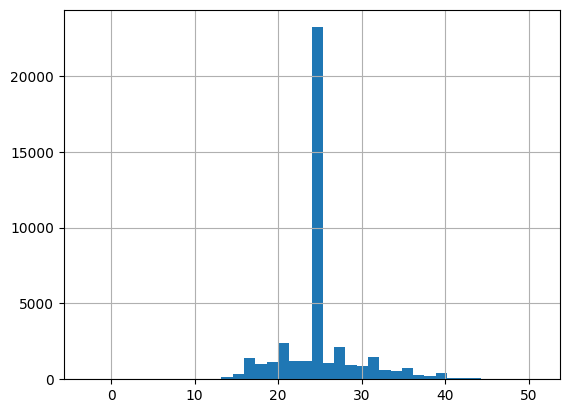

In [ ]:
df["AGE"].hist(bins=40);

In [ ]:
fig = px.box(df, y="AGE")
fig

In [ ]:
'''
# Creating a subset for positive cases (people with syphilis)
df_positive = df[df['VDRL_RESULT'] == 1.0]

# Creating a subset for negative cases (people without syphilis)
df_negative = df[df['VDRL_RESULT'] == 0.0]

'''

"\n# Creating a subset for positive cases (people with syphilis)\ndf_positive = df[df['VDRL_RESULT'] == 1.0]\n\n# Creating a subset for negative cases (people without syphilis)\ndf_negative = df[df['VDRL_RESULT'] == 0.0]\n\n"

In [ ]:
# Separate features and target variable
X = df.drop('VDRL_RESULT', axis=1)
y = df['VDRL_RESULT']

# Applying SMOTE to balance the classes
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Creating a new balanced DataFrame
df_balanced = pd.DataFrame(X_resampled, columns=X.columns)
df_balanced['VDRL_RESULT'] = y_resampled

# Displaying class distribution after SMOTE
print(df_balanced['VDRL_RESULT'].value_counts())

VDRL_RESULT
1.0    40936
0.0    40936
Name: count, dtype: int64


In [ ]:
df_balanced.shape


(81872, 26)

In [ ]:
corr_matrix = df.corr()

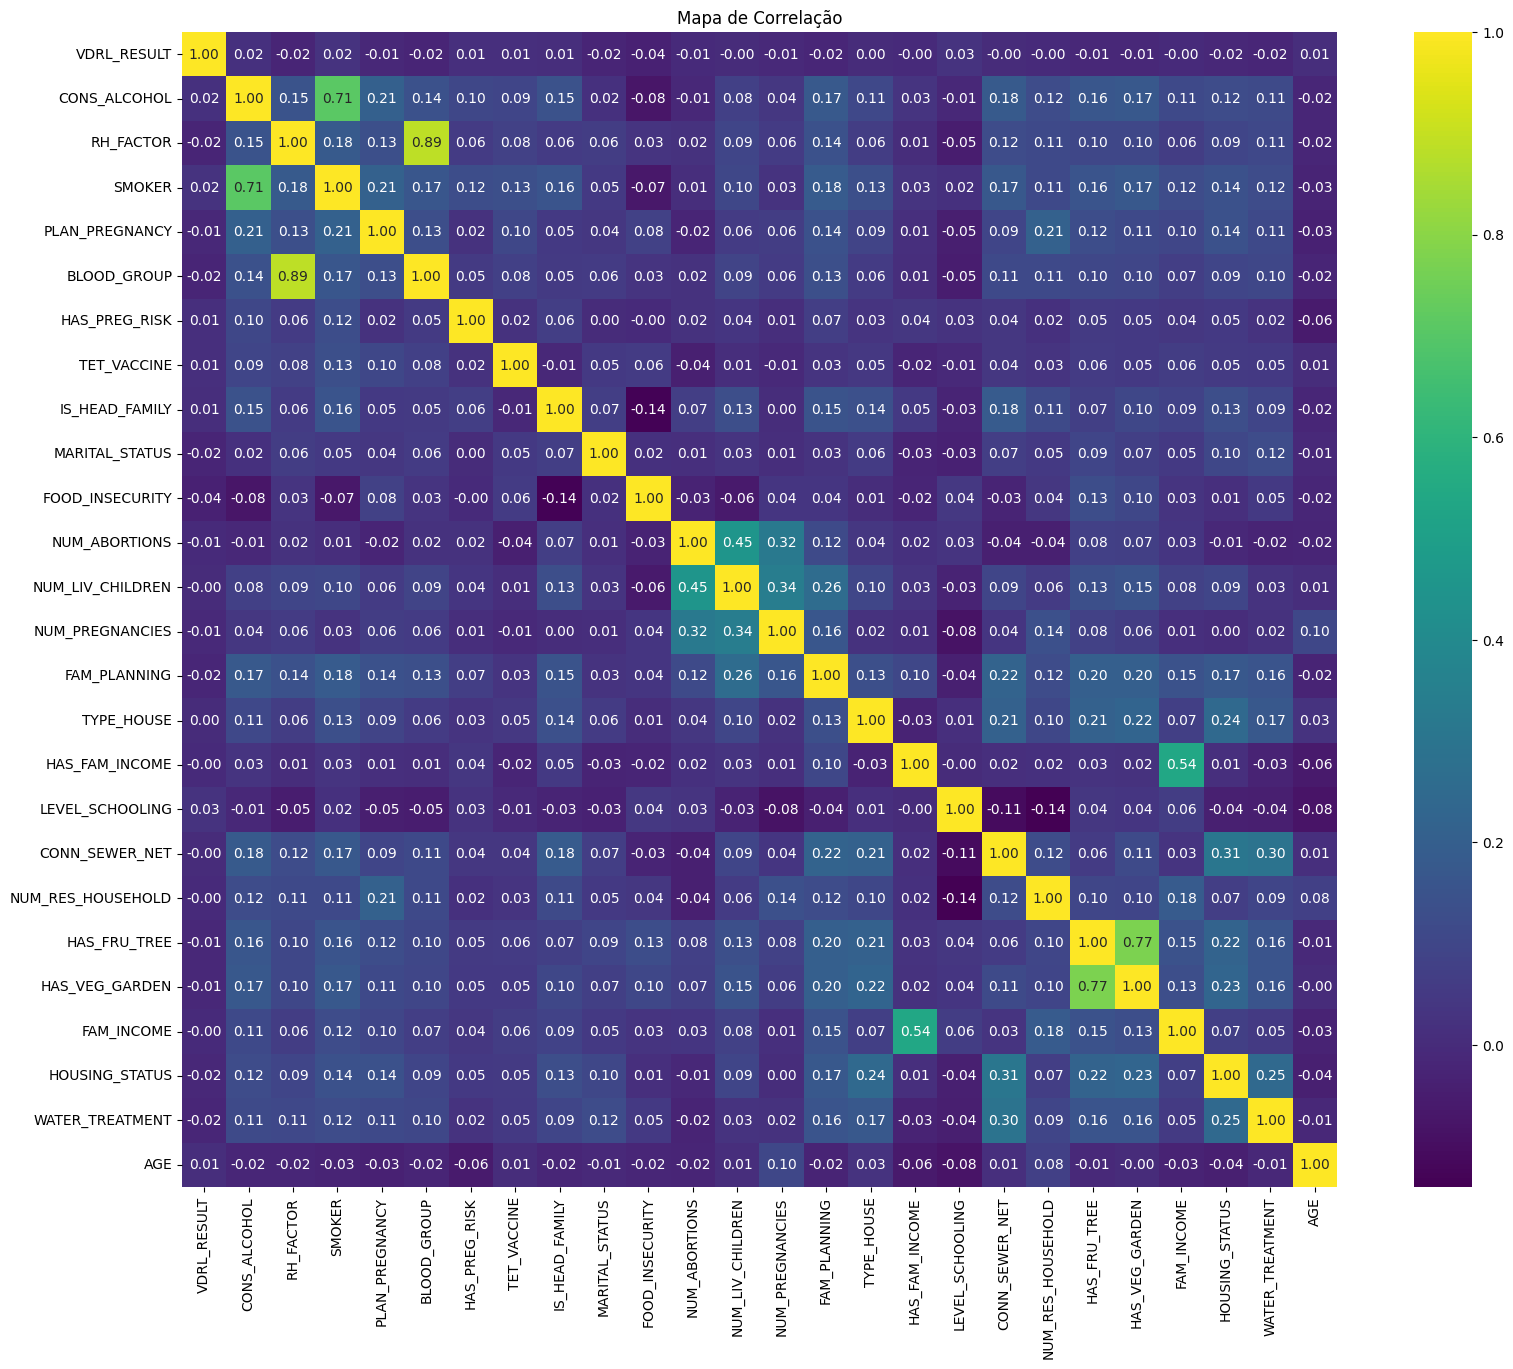

In [ ]:
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', cbar=True, square=True, fmt='.2f')
plt.title('Mapa de Correlação')
plt.show()

# 3.0 Classification

#### 3.1 dividing dataset

In [35]:
X = df_balanced.drop(columns=["VDRL_RESULT"])

y = df_balanced["VDRL_RESULT"]

In [ ]:
print(y.head(2))
print("\n")

X.head(2)

0    1.0
1    1.0
Name: VDRL_RESULT, dtype: float64




CONS_ALCOHOL  RH_FACTOR  SMOKER  PLAN_PREGNANCY  BLOOD_GROUP  \
0           1.0        0.0     1.0             1.0          1.0   
1           1.0        0.0     1.0             1.0          0.0   

   HAS_PREG_RISK  TET_VACCINE  IS_HEAD_FAMILY  MARITAL_STATUS  \
0            1.0          0.0             1.0             0.0   
1            1.0          0.0             1.0             5.0   

   FOOD_INSECURITY  ...  HAS_FAM_INCOME  LEVEL_SCHOOLING  CONN_SEWER_NET  \
0              0.0  ...             0.0              5.0             0.0   
1              0.0  ...             0.0              5.0             0.0   

   NUM_RES_HOUSEHOLD  HAS_FRU_TREE  HAS_VEG_GARDEN  FAM_INCOME  \
0                2.0           1.0             1.0         0.0   
1                2.0           1.0             1.0         2.0   

   HOUSING_STATUS  WATER_TREATMENT   AGE  
0             1.0              2.0  25.0  
1             1.0              3.0  25.0  

[2 rows x 25 columns]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### 3.2 Training models

##### 3.2.1 Testing hiperparams

In [ ]:
knn = KNeighborsClassifier()

rf = RandomForestClassifier(random_state=42)

dt =DecisionTreeClassifier(random_state=42)

lr = LogisticRegression(random_state=42)

xgb = XGBClassifier(random_state=42)

In [ ]:
# Definindo os hiperparâmetros para variação
n_neighbors_list_knn = [1, 2, 3, 4, 5, 9, 11]
weights_list_knn = ["uniform", "distance"]

# Lista para armazenar resultados
results = []

def train_knn_models(X_train, y_train, X_test, y_test):
    for n_neighbors in n_neighbors_list_knn:
        for weight in weights_list_knn:
            # Cria o modelo KNN com os parâmetros específicos
            knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weight)

            # Treina o modelo
            knn.fit(X_train, y_train)

            # Faz previsões no conjunto de teste
            y_pred = knn.predict(X_test)

            # Calcula as métricas
            accuracy = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='weighted')
            precision = precision_score(y_test, y_pred, average='weighted')
            recall = recall_score(y_test, y_pred, average='weighted')

            # Armazena os resultados
            results.append({
                "n_neighbors": n_neighbors,
                "weights": weight,
                "accuracy": accuracy
            })

            print(f"Modelo com n_neighbors={n_neighbors}, weights={weight} -> "
                  f"Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")

    return results

In [ ]:
results_knn = train_knn_models(X_train, y_train, X_test, y_test)

Modelo com n_neighbors=1, weights=uniform -> Accuracy: 0.9654, F1 Score: 0.9646, Precision: 0.9637, Recall: 0.9654
Modelo com n_neighbors=1, weights=distance -> Accuracy: 0.9654, F1 Score: 0.9646, Precision: 0.9637, Recall: 0.9654
Modelo com n_neighbors=2, weights=uniform -> Accuracy: 0.9474, F1 Score: 0.9553, Precision: 0.9636, Recall: 0.9474
Modelo com n_neighbors=2, weights=distance -> Accuracy: 0.9590, F1 Score: 0.9613, Precision: 0.9636, Recall: 0.9590
Modelo com n_neighbors=3, weights=uniform -> Accuracy: 0.9797, F1 Score: 0.9713, Precision: 0.9630, Recall: 0.9797
Modelo com n_neighbors=3, weights=distance -> Accuracy: 0.9795, F1 Score: 0.9713, Precision: 0.9638, Recall: 0.9795
Modelo com n_neighbors=4, weights=uniform -> Accuracy: 0.9784, F1 Score: 0.9706, Precision: 0.9629, Recall: 0.9784
Modelo com n_neighbors=4, weights=distance -> Accuracy: 0.9792, F1 Score: 0.9712, Precision: 0.9637, Recall: 0.9792
Modelo com n_neighbors=5, weights=uniform -> Accuracy: 0.9812, F1 Score: 0.9

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Modelo com n_neighbors=9, weights=uniform -> Accuracy: 0.9813, F1 Score: 0.9721, Precision: 0.9630, Recall: 0.9813
Modelo com n_neighbors=9, weights=distance -> Accuracy: 0.9812, F1 Score: 0.9721, Precision: 0.9677, Recall: 0.9812


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Modelo com n_neighbors=11, weights=uniform -> Accuracy: 0.9813, F1 Score: 0.9721, Precision: 0.9630, Recall: 0.9813
Modelo com n_neighbors=11, weights=distance -> Accuracy: 0.9812, F1 Score: 0.9721, Precision: 0.9677, Recall: 0.9812


**The best KNN is n_neighbors=1 and weights=uniform**

In [ ]:
# Definindo os hiperparâmetros para variação
n_estimators_list_rf = [50,100, 200, 300]
max_depth_list_rf = [None, 5, 10, 20]

# Lista para armazenar resultados
rf_results = []

def train_rf_models(X_train, y_train, X_test, y_test):
    for n_estimators in n_estimators_list_rf:
        for max_depth in max_depth_list_rf:
            # Cria o modelo Random Forest com os parâmetros específicos
            rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)

            # Treina o modelo
            rf.fit(X_train, y_train)

            # Faz previsões no conjunto de teste
            y_pred = rf.predict(X_test)

            # Calcula as métricas
            accuracy = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='weighted')
            precision = precision_score(y_test, y_pred, average='weighted')
            recall = recall_score(y_test, y_pred, average='weighted')

            # Armazena os resultados
            rf_results.append({
                "n_estimators": n_estimators,
                "max_depth": max_depth,
                "accuracy": accuracy,
                "f1_score": f1,
                "precision": precision,
                "recall": recall
            })

            print(f"Modelo com n_estimators={n_estimators}, max_depth={max_depth} -> "
                  f"Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")

    return rf_results


In [ ]:
rf_results = train_rf_models(X_train, y_train, X_test, y_test)

Modelo com n_estimators=50, max_depth=None -> Accuracy: 0.9896, F1 Score: 0.9896, Precision: 0.9898, Recall: 0.9896
Modelo com n_estimators=50, max_depth=5 -> Accuracy: 0.8915, F1 Score: 0.8915, Precision: 0.8915, Recall: 0.8915
Modelo com n_estimators=50, max_depth=10 -> Accuracy: 0.9752, F1 Score: 0.9752, Precision: 0.9758, Recall: 0.9752
Modelo com n_estimators=50, max_depth=20 -> Accuracy: 0.9897, F1 Score: 0.9897, Precision: 0.9898, Recall: 0.9897
Modelo com n_estimators=100, max_depth=None -> Accuracy: 0.9897, F1 Score: 0.9897, Precision: 0.9898, Recall: 0.9897
Modelo com n_estimators=100, max_depth=5 -> Accuracy: 0.8950, F1 Score: 0.8950, Precision: 0.8950, Recall: 0.8950
Modelo com n_estimators=100, max_depth=10 -> Accuracy: 0.9758, F1 Score: 0.9758, Precision: 0.9763, Recall: 0.9758
Modelo com n_estimators=100, max_depth=20 -> Accuracy: 0.9897, F1 Score: 0.9897, Precision: 0.9899, Recall: 0.9897
Modelo com n_estimators=200, max_depth=None -> Accuracy: 0.9897, F1 Score: 0.9897,

**The best Random Forest is n_estimators=200 and max_depth=None**

In [ ]:
# Lista de valores para o hiperparâmetro max_depth
max_depth_list_dt = [None, 5 ,10, 20, 30, 50, 75, 100]

# Lista para armazenar os resultados
dt_results = []

def train_dt_models(X_train, y_train, X_test, y_test):
    for max_depth in max_depth_list_dt:
        # Cria o modelo Decision Tree com o parâmetro max_depth específico
        dt = DecisionTreeClassifier(max_depth=max_depth, random_state=42)

        # Treina o modelo
        dt.fit(X_train, y_train)

        # Faz previsões no conjunto de teste
        y_pred = dt.predict(X_test)

        # Calcula as métricas
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')

        # Armazena os resultados
        dt_results.append({
            "max_depth": max_depth,
            "accuracy": accuracy,
            "f1_score": f1,
            "precision": precision,
            "recall": recall
        })

        print(f"Modelo com max_depth={max_depth} -> "
              f"Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")

    return dt_results


In [ ]:
dt_results = train_dt_models(X_train, y_train, X_test, y_test)

Modelo com max_depth=None -> Accuracy: 0.9761, F1 Score: 0.9761, Precision: 0.9761, Recall: 0.9761
Modelo com max_depth=5 -> Accuracy: 0.8075, F1 Score: 0.8062, Precision: 0.8162, Recall: 0.8075
Modelo com max_depth=10 -> Accuracy: 0.8901, F1 Score: 0.8889, Precision: 0.9068, Recall: 0.8901
Modelo com max_depth=20 -> Accuracy: 0.9750, F1 Score: 0.9750, Precision: 0.9750, Recall: 0.9750
Modelo com max_depth=30 -> Accuracy: 0.9759, F1 Score: 0.9759, Precision: 0.9760, Recall: 0.9759
Modelo com max_depth=50 -> Accuracy: 0.9761, F1 Score: 0.9761, Precision: 0.9761, Recall: 0.9761
Modelo com max_depth=75 -> Accuracy: 0.9761, F1 Score: 0.9761, Precision: 0.9761, Recall: 0.9761
Modelo com max_depth=100 -> Accuracy: 0.9761, F1 Score: 0.9761, Precision: 0.9761, Recall: 0.9761


**The best Decision Tree is max_depth=50**

In [ ]:
# Lista de valores para o hiperparâmetro C
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Lista para armazenar os resultados
lr_results = []

def train_lr_models(X_train, y_train, X_test, y_test):
    for C in C_values:
        # Cria o modelo Logistic Regression com o parâmetro C específico
        lr = LogisticRegression(C=C, random_state=42, max_iter=200, solver='liblinear') # 'liblinear' é compatível com L1 e L2

        # Treina o modelo
        lr.fit(X_train, y_train)

        # Faz previsões no conjunto de teste
        y_pred = lr.predict(X_test)

        # Calcula as métricas
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')

        # Armazena os resultados
        lr_results.append({
            "C": C,
            "accuracy": accuracy,
            "f1_score": f1,
            "precision": precision,
            "recall": recall
        })

        print(f"Modelo com C={C} -> "
              f"Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")

    return lr_results


In [ ]:
lr_results = train_lr_models(X_train, y_train, X_test, y_test)

Modelo com C=0.001 -> Accuracy: 0.6146, F1 Score: 0.6145, Precision: 0.6147, Recall: 0.6146
Modelo com C=0.01 -> Accuracy: 0.6149, F1 Score: 0.6148, Precision: 0.6151, Recall: 0.6149
Modelo com C=0.1 -> Accuracy: 0.6144, F1 Score: 0.6143, Precision: 0.6146, Recall: 0.6144
Modelo com C=1 -> Accuracy: 0.6143, F1 Score: 0.6142, Precision: 0.6144, Recall: 0.6143
Modelo com C=10 -> Accuracy: 0.6142, F1 Score: 0.6141, Precision: 0.6143, Recall: 0.6142
Modelo com C=100 -> Accuracy: 0.6142, F1 Score: 0.6141, Precision: 0.6143, Recall: 0.6142
Modelo com C=1000 -> Accuracy: 0.6142, F1 Score: 0.6141, Precision: 0.6143, Recall: 0.6142


**The best Logic Regression is C=0.01**

In [ ]:
# Definindo os hiperparâmetros para variação
n_estimators_list_xgb = [50, 300, 500]
max_depth_list_xgb = [6, 10, 20]
learning_rate_list_xgb = [0.1, 0.2, 0.5]

# Lista para armazenar os resultados
xgb_results = []

def train_xgb_models(X_train, y_train, X_test, y_test):
    for n_estimators in n_estimators_list_xgb:
        for max_depth in max_depth_list_xgb:
            for learning_rate in learning_rate_list_xgb:
                # Cria o modelo XGBClassifier com os parâmetros específicos
                xgb = XGBClassifier(
                    n_estimators=n_estimators,
                    max_depth=max_depth,
                    learning_rate=learning_rate,
                    random_state=42,
                    eval_metric='logloss'
                )

                # Treina o modelo
                xgb.fit(X_train, y_train)

                # Faz previsões no conjunto de teste
                y_pred = xgb.predict(X_test)

                # Calcula as métricas
                accuracy = accuracy_score(y_test, y_pred)
                f1 = f1_score(y_test, y_pred, average='weighted')
                precision = precision_score(y_test, y_pred, average='weighted')
                recall = recall_score(y_test, y_pred, average='weighted')

                xgb_results.append({
                    "n_estimators": n_estimators,
                    "max_depth": max_depth,
                    "learning_rate": learning_rate,
                    "accuracy": accuracy,
                    "f1_score": f1,
                    "precision": precision,
                    "recall": recall
                })

                print(f"Modelo com n_estimators={n_estimators}, max_depth={max_depth}, learning_rate={learning_rate} -> "
                      f"Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")

    return xgb_results


In [ ]:
xgb_results = train_xgb_models(X_train, y_train, X_test, y_test)

Modelo com n_estimators=50, max_depth=6, learning_rate=0.1 -> Accuracy: 0.9829, F1 Score: 0.9829, Precision: 0.9834, Recall: 0.9829
Modelo com n_estimators=50, max_depth=6, learning_rate=0.2 -> Accuracy: 0.9882, F1 Score: 0.9882, Precision: 0.9885, Recall: 0.9882
Modelo com n_estimators=50, max_depth=6, learning_rate=0.5 -> Accuracy: 0.9899, F1 Score: 0.9899, Precision: 0.9901, Recall: 0.9899
Modelo com n_estimators=50, max_depth=10, learning_rate=0.1 -> Accuracy: 0.9882, F1 Score: 0.9882, Precision: 0.9884, Recall: 0.9882
Modelo com n_estimators=50, max_depth=10, learning_rate=0.2 -> Accuracy: 0.9899, F1 Score: 0.9899, Precision: 0.9901, Recall: 0.9899
Modelo com n_estimators=50, max_depth=10, learning_rate=0.5 -> Accuracy: 0.9901, F1 Score: 0.9901, Precision: 0.9903, Recall: 0.9901
Modelo com n_estimators=50, max_depth=20, learning_rate=0.1 -> Accuracy: 0.9894, F1 Score: 0.9894, Precision: 0.9896, Recall: 0.9894
Modelo com n_estimators=50, max_depth=20, learning_rate=0.2 -> Accuracy:

**The best Xgboost is n_estimators=500, max_depth=20, learning_rate=0.1**

##### 3.2.2 Training the models with the best hiperparams

In [37]:
knn_best = KNeighborsClassifier(n_neighbors=1, weights="uniform").fit(X_train, y_train)


rf_best = RandomForestClassifier(n_estimators=50, max_depth=None, random_state=42).fit(X_train, y_train)


dt_best =DecisionTreeClassifier(max_depth=50, random_state=42).fit(X_train, y_train)


lr_best = LogisticRegression(C = 0.01, random_state=42).fit(X_train, y_train)


xgb_best = XGBClassifier(n_estimators = 500, max_depth = 20, learning_rate = 0.1, random_state=42).fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



##### 3.2.3 Evaluating models

In [ ]:
def evaluate_classification(model, X_test, y_test):

    pred = model.predict(X_test)

    print("Acurácia: ", accuracy_score(y_test, pred))
    print("Recall: ", recall_score(y_test, pred))
    print("Precisão: ", precision_score(y_test, pred))
    print("F1-Score: ", f1_score(y_test, pred))

In [ ]:
def confusion_matrix_visualization(y_test, y_pred):

    plt.figure(figsize=(5,5))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="g")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")

![image.png](attachment:image.png)

KNN

In [ ]:
evaluate_classification(knn_best, X_test, y_test)

Acurácia:  0.9521211627717613
Recall:  0.9057676685621446
Precisão:  0.9985670786315601
F1-Score:  0.9499062872721077


In [ ]:
pred_knn = knn_best.predict(X_test)

[[12236    16]
 [ 1160 11150]]


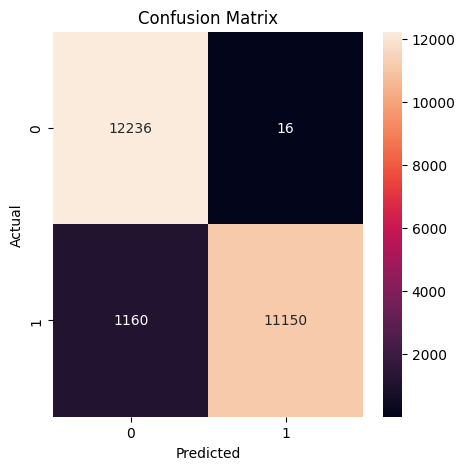

In [ ]:
print(confusion_matrix(y_test, pred_knn))
confusion_matrix_visualization(y_test, pred_knn)

Random Forest

In [ ]:
evaluate_classification(rf_best, X_test, y_test)

Acurácia:  0.989618109274489
Recall:  0.9992688870836718
Precisão:  0.9803937196142504
F1-Score:  0.9897413203524158


In [ ]:
pred_rf = rf_best.predict(X_test)

[[12006   246]
 [    9 12301]]


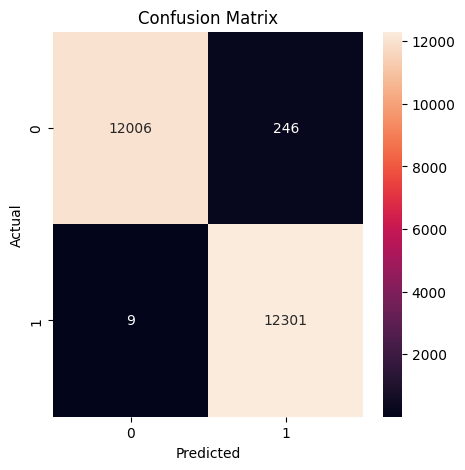

In [ ]:
print(confusion_matrix(y_test, pred_rf))
confusion_matrix_visualization(y_test, pred_rf)

In [ ]:
feature_imp_rf = pd.Series(rf_best.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_imp_rf

FOOD_INSECURITY      0.117128
PLAN_PREGNANCY       0.116528
FAM_PLANNING         0.098528
CONN_SEWER_NET       0.083870
HOUSING_STATUS       0.080988
LEVEL_SCHOOLING      0.052152
HAS_FRU_TREE         0.052044
IS_HEAD_FAMILY       0.035351
WATER_TREATMENT      0.034536
NUM_RES_HOUSEHOLD    0.032214
SMOKER               0.029418
NUM_PREGNANCIES      0.026813
HAS_VEG_GARDEN       0.026128
CONS_ALCOHOL         0.024645
BLOOD_GROUP          0.023614
FAM_INCOME           0.023406
HAS_PREG_RISK        0.021681
AGE                  0.020870
HAS_FAM_INCOME       0.018353
TET_VACCINE          0.017611
NUM_LIV_CHILDREN     0.017410
MARITAL_STATUS       0.015772
NUM_ABORTIONS        0.014444
RH_FACTOR            0.010024
TYPE_HOUSE           0.006474
dtype: float64

Decision Tree

In [ ]:
evaluate_classification(dt_best, X_test, y_test)

Acurácia:  0.9760605813858806
Recall:  0.9714865962632007
Precisão:  0.9805673991472614
F1-Score:  0.9760058761119725


In [ ]:
pred_dt = dt_best.predict(X_test)

[[12015   237]
 [  351 11959]]


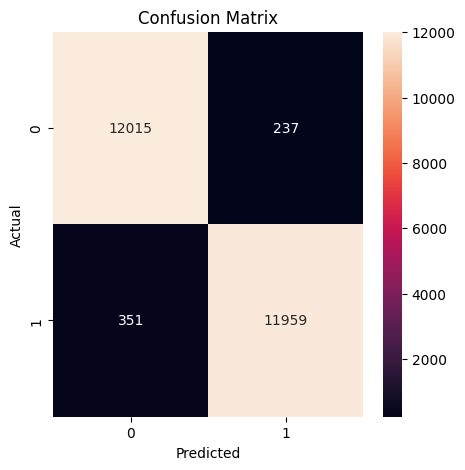

In [ ]:
print(confusion_matrix(y_test, pred_dt))
confusion_matrix_visualization(y_test, pred_dt)

In [ ]:
feature_imp_dt = pd.Series(dt_best.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_imp_dt

FOOD_INSECURITY      0.318523
FAM_PLANNING         0.124344
PLAN_PREGNANCY       0.114046
CONN_SEWER_NET       0.079159
HAS_FRU_TREE         0.040054
SMOKER               0.039095
HOUSING_STATUS       0.039001
IS_HEAD_FAMILY       0.031972
LEVEL_SCHOOLING      0.026448
NUM_RES_HOUSEHOLD    0.023609
NUM_PREGNANCIES      0.022915
HAS_PREG_RISK        0.021492
AGE                  0.014865
WATER_TREATMENT      0.012445
CONS_ALCOHOL         0.012269
MARITAL_STATUS       0.011465
FAM_INCOME           0.010869
BLOOD_GROUP          0.010642
HAS_FAM_INCOME       0.010282
TET_VACCINE          0.009522
NUM_LIV_CHILDREN     0.009263
NUM_ABORTIONS        0.005178
TYPE_HOUSE           0.004833
RH_FACTOR            0.003938
HAS_VEG_GARDEN       0.003771
dtype: float64

Logistic Regression

In [ ]:
evaluate_classification(lr_best, X_test, y_test)

Acurácia:  0.61448579105936
Recall:  0.5990251827782291
Precisão:  0.6192995716805241
F1-Score:  0.6089936821241276


In [ ]:
pred_lr = lr_best.predict(X_test)

[[7719 4533]
 [4936 7374]]


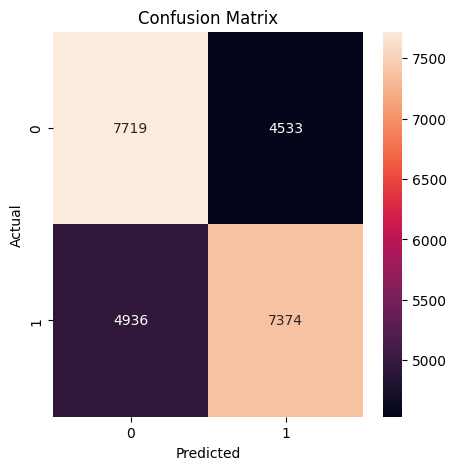

In [ ]:
print(confusion_matrix(y_test, pred_lr))
confusion_matrix_visualization(y_test, pred_lr)

XGBoost

In [ ]:
evaluate_classification(xgb_best, X_test, y_test)

Acurácia:  0.9902695220258937
Recall:  0.9988627132412673
Precisão:  0.9820301892820062
F1-Score:  0.9903749345576094


In [ ]:
pred_xgb = xgb_best.predict(X_test)

[[12027   225]
 [   14 12296]]


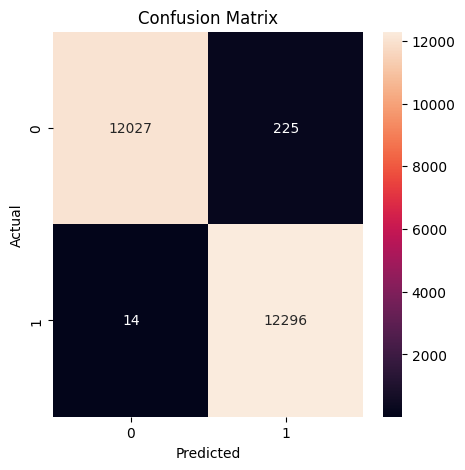

In [ ]:
print(confusion_matrix(y_test, pred_xgb))
confusion_matrix_visualization(y_test, pred_xgb)

In [ ]:
feature_imp_xgb = pd.Series(xgb_best.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_imp_xgb

FOOD_INSECURITY      0.244602
PLAN_PREGNANCY       0.161220
CONN_SEWER_NET       0.082972
SMOKER               0.082254
HAS_FRU_TREE         0.064750
FAM_PLANNING         0.062246
HOUSING_STATUS       0.033265
CONS_ALCOHOL         0.031362
HAS_VEG_GARDEN       0.030228
IS_HEAD_FAMILY       0.029546
HAS_PREG_RISK        0.027576
TYPE_HOUSE           0.020300
TET_VACCINE          0.018107
WATER_TREATMENT      0.016506
NUM_RES_HOUSEHOLD    0.014411
HAS_FAM_INCOME       0.013637
LEVEL_SCHOOLING      0.012284
NUM_PREGNANCIES      0.010309
FAM_INCOME           0.008177
NUM_ABORTIONS        0.006596
BLOOD_GROUP          0.006353
MARITAL_STATUS       0.006224
NUM_LIV_CHILDREN     0.006161
AGE                  0.005658
RH_FACTOR            0.005257
dtype: float32

Evaluating models using cross validation (k_fold)

In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
# KNN
knn_scores = cross_val_score(knn_best, X, y, cv=kfold, scoring='accuracy')
print("KNN Cross-validation scores:", knn_scores)
print("KNN Average accuracy:", knn_scores.mean())

# Random Forest
rf_scores = cross_val_score(rf_best, X, y, cv=kfold, scoring='accuracy')
print("\nRandom Forest Cross-validation scores:", rf_scores)
print("Random Forest Average accuracy:", rf_scores.mean())

# Decision Tree
dt_scores = cross_val_score(dt_best, X, y, cv=kfold, scoring='accuracy')
print("\nDecision Tree Cross-validation scores:", dt_scores)
print("Decision Tree Average accuracy:", dt_scores.mean())

# Logistic Regression
lr_scores = cross_val_score(lr_best, X, y, cv=kfold, scoring='accuracy')
print("\nLogistic Regression Cross-validation scores:", lr_scores)
print("Logistic Regression Average accuracy:", lr_scores.mean())

# XGBoost
xgb_scores = cross_val_score(xgb_best, X, y, cv=kfold, scoring='accuracy')
print("\nXGBoost Cross-validation scores:", xgb_scores)
print("XGBoost Average accuracy:", xgb_scores.mean())

KNN Cross-validation scores: [0.9580458  0.95603053 0.95938683 0.95572249 0.95749359]
KNN Average accuracy: 0.9573358485851242

Random Forest Cross-validation scores: [0.99053435 0.98876336 0.98931232 0.99004519 0.98955661]
Random Forest Average accuracy: 0.9896423684168812

Decision Tree Cross-validation scores: [0.97654962 0.97453435 0.97404422 0.97465494 0.97557103]
Decision Tree Average accuracy: 0.9750708307808786


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


Logistic Regression Cross-validation scores: [0.61429008 0.61429008 0.61921339 0.61463295 0.61426652]
Logistic Regression Average accuracy: 0.6153386029051828

XGBoost Cross-validation scores: [0.99096183 0.9890687  0.98955661 0.98955661 0.98943447]
XGBoost Average accuracy: 0.9897156463840926


# 4.0 Regression

##### 4.1 Dividing dataset

In [ ]:
X_r = df_balanced.drop(columns=["AGE"])

y_r = df_balanced["AGE"]

In [ ]:
print(y_r.head(2))
print("\n")

X_r.head(2)

0    25.0
1    25.0
Name: AGE, dtype: float64




CONS_ALCOHOL  RH_FACTOR  SMOKER  PLAN_PREGNANCY  BLOOD_GROUP  \
0           1.0        0.0     1.0             1.0          1.0   
1           1.0        0.0     1.0             1.0          0.0   

   HAS_PREG_RISK  TET_VACCINE  IS_HEAD_FAMILY  MARITAL_STATUS  \
0            1.0          0.0             1.0             0.0   
1            1.0          0.0             1.0             5.0   

   FOOD_INSECURITY  ...  HAS_FAM_INCOME  LEVEL_SCHOOLING  CONN_SEWER_NET  \
0              0.0  ...             0.0              5.0             0.0   
1              0.0  ...             0.0              5.0             0.0   

   NUM_RES_HOUSEHOLD  HAS_FRU_TREE  HAS_VEG_GARDEN  FAM_INCOME  \
0                2.0           1.0             1.0         0.0   
1                2.0           1.0             1.0         2.0   

   HOUSING_STATUS  WATER_TREATMENT  VDRL_RESULT  
0             1.0              2.0          1.0  
1             1.0              3.0          1.0  

[2 rows x 25 columns]

In [ ]:
X_r_train, X_r_test, y_r_train, y_r_test = train_test_split(X_r, y_r, test_size=0.3, random_state=42)

In [ ]:
print(X_r_train.shape, X_r_test.shape)

print(y_r_train.shape, y_r_test.shape)

(57310, 25) (24562, 25)
(57310,) (24562,)


In [ ]:
scaler = StandardScaler()

In [ ]:
cols = X_r.columns
cols

Index(['CONS_ALCOHOL', 'RH_FACTOR', 'SMOKER', 'PLAN_PREGNANCY', 'BLOOD_GROUP',
       'HAS_PREG_RISK', 'TET_VACCINE', 'IS_HEAD_FAMILY', 'MARITAL_STATUS',
       'FOOD_INSECURITY', 'NUM_ABORTIONS', 'NUM_LIV_CHILDREN',
       'NUM_PREGNANCIES', 'FAM_PLANNING', 'TYPE_HOUSE', 'HAS_FAM_INCOME',
       'LEVEL_SCHOOLING', 'CONN_SEWER_NET', 'NUM_RES_HOUSEHOLD',
       'HAS_FRU_TREE', 'HAS_VEG_GARDEN', 'FAM_INCOME', 'HOUSING_STATUS',
       'WATER_TREATMENT', 'VDRL_RESULT'],
      dtype='object')

In [ ]:
X_r_train = scaler.fit_transform(X_r_train)
X_r_train = pd.DataFrame(X_r_train, columns=cols)

X_r_test = scaler.fit_transform(X_r_test)
X_r_test = pd.DataFrame(X_r_test, columns=cols)

In [ ]:
print(X_r_train.head(2))

print("\n")

print(X_r_test.head(2))

   CONS_ALCOHOL  RH_FACTOR    SMOKER  PLAN_PREGNANCY  BLOOD_GROUP  \
0     -0.117285  -0.834678 -0.018365       -1.337654    -0.766007   
1      0.193862  -0.834678 -0.018365       -1.130086    -1.018993   

   HAS_PREG_RISK  TET_VACCINE  IS_HEAD_FAMILY  MARITAL_STATUS  \
0        0.25556    -0.336035        0.150341        1.050437   
1        0.25556    -0.336035        0.150341       -0.710168   

   FOOD_INSECURITY  ...  HAS_FAM_INCOME  LEVEL_SCHOOLING  CONN_SEWER_NET  \
0         0.204729  ...       -0.596172         1.024743       -0.210813   
1         0.831538  ...       -0.596172         0.423800        0.876370   

   NUM_RES_HOUSEHOLD  HAS_FRU_TREE  HAS_VEG_GARDEN  FAM_INCOME  \
0           0.379672      -0.00372       -0.179081   -0.171599   
1          -1.288374      -0.00372       -0.179081   -1.020226   

   HOUSING_STATUS  WATER_TREATMENT  VDRL_RESULT  
0       -0.113365         1.015496    -0.998988  
1       -0.849181        -1.608337    -0.998988  

[2 rows x 25 colu

#### 4.2 Training models

##### 4.2.1 Testing Hiperparams

In [ ]:
knn_r = KNeighborsRegressor()

rf_r = RandomForestRegressor(random_state=42)

dt_r = DecisionTreeRegressor(random_state=42)

lr_r = LinearRegression()

xgb_r = XGBRegressor(random_state=42)

In [ ]:
def safe_mape(y_true, y_pred, threshold=1e-2):
    # Ignora valores muito pequenos em y_true, substituindo por NaN onde necessário
    mask = np.abs(y_true) >= threshold
    y_true_filtered = y_true[mask]
    y_pred_filtered = y_pred[mask]

    # Calcula o MAPE usando apenas os valores que passaram pelo filtro
    return np.mean(np.abs((y_true_filtered - y_pred_filtered) / y_true_filtered)) * 100 if len(y_true_filtered) > 0 else np.nan

In [ ]:
# Definindo os hiperparâmetros para variação
n_neighbors_list_knn_r = [12, 13, 14, 15, 16]
weights_list_knn_r = ["uniform", "distance"]

# Lista para armazenar resultados
regression_results = []

def train_knn_regressor_models(X_train, y_train, X_test, y_test):

    for n_neighbors in n_neighbors_list_knn_r:
        for weight in weights_list_knn_r:
            # Cria o modelo KNN Regressor com os parâmetros específicos
            knn_regressor = KNeighborsRegressor(n_neighbors=n_neighbors, weights=weight)

            # Treina o modelo
            knn_regressor.fit(X_train, y_train)

            # Faz previsões no conjunto de teste
            y_pred = knn_regressor.predict(X_test)

            r2 = r2_score(y_test, y_pred)
            mae = mean_absolute_error(y_test, y_pred)
            mse = mean_squared_error(y_test, y_pred)
            mape = safe_mape(y_test, y_pred)
            rmse = np.sqrt(mse)

            regression_results.append({
                "n_neighbors": n_neighbors,
                "weights": weight,
                "r2_score": r2,
                "mae": mae,
                "mse": mse,
                "mape": mape,
                "rmse": rmse
            })

            print(f"Modelo com n_neighbors={n_neighbors}, weights={weight} -> "
                  f"R² Score: {r2:.4f}, MAE: {mae:.4f}, MSE: {mse:.4f}, MAPE: {mape:.4f}, RMSE: {rmse:.4f}")

    return regression_results

In [ ]:
results_knn_r = train_knn_regressor_models(X_r_train, y_r_train, X_r_test, y_r_test)

Modelo com n_neighbors=9, weights=uniform -> R² Score: 0.5046, MAE: 1.6084, MSE: 10.1984, MAPE: 6.7166, RMSE: 3.1935
Modelo com n_neighbors=9, weights=distance -> R² Score: 0.5226, MAE: 1.5438, MSE: 9.8266, MAPE: 6.4448, RMSE: 3.1347
Modelo com n_neighbors=10, weights=uniform -> R² Score: 0.5064, MAE: 1.6072, MSE: 10.1613, MAPE: 6.7140, RMSE: 3.1877
Modelo com n_neighbors=10, weights=distance -> R² Score: 0.5244, MAE: 1.5412, MSE: 9.7900, MAPE: 6.4369, RMSE: 3.1289
Modelo com n_neighbors=11, weights=uniform -> R² Score: 0.5059, MAE: 1.6089, MSE: 10.1714, MAPE: 6.7261, RMSE: 3.1893
Modelo com n_neighbors=11, weights=distance -> R² Score: 0.5243, MAE: 1.5418, MSE: 9.7921, MAPE: 6.4423, RMSE: 3.1292
Modelo com n_neighbors=12, weights=uniform -> R² Score: 0.5071, MAE: 1.6103, MSE: 10.1475, MAPE: 6.7349, RMSE: 3.1855
Modelo com n_neighbors=12, weights=distance -> R² Score: 0.5256, MAE: 1.5416, MSE: 9.7658, MAPE: 6.4435, RMSE: 3.1250
Modelo com n_neighbors=13, weights=uniform -> R² Score: 0.

**The best KNN Regressor is n_neighbors=15 and weights=distance**

In [ ]:
# Definindo os hiperparâmetros para variação
n_estimators_list_rf_r = [1000]
max_depth_list_rf_r = [20, 15, 30]

# Lista para armazenar resultados
regression_results_rf_r = []

def train_rf_regressor_models(X_train, y_train, X_test, y_test):
    for n_estimators in n_estimators_list_rf_r:
        for max_depth in max_depth_list_rf_r:
            # Cria o modelo Random Forest Regressor com os parâmetros específicos
            rf_regressor = RandomForestRegressor(
                n_estimators=n_estimators,
                max_depth=max_depth,
                random_state=42
            )

            rf_regressor.fit(X_train, y_train)

            y_pred = rf_regressor.predict(X_test)

            r2 = r2_score(y_test, y_pred)
            mae = mean_absolute_error(y_test, y_pred)
            mse = mean_squared_error(y_test, y_pred)
            rmse = np.sqrt(mse)

            mape = safe_mape(y_test, y_pred)

            regression_results_rf_r.append({
                "n_estimators": n_estimators,
                "max_depth": max_depth,
                "r2_score": r2,
                "mae": mae,
                "mse": mse,
                "mape": mape,
                "rmse": rmse
            })

            print(f"Modelo com n_estimators={n_estimators}, max_depth={max_depth} -> "
                  f"R² Score: {r2:.4f}, MAE: {mae:.4f}, MSE: {mse:.4f}, MAPE: {mape:.4f}, RMSE: {rmse:.4f}")

    return regression_results_rf_r

In [ ]:
results_rf_r = train_rf_regressor_models(X_r_train, y_r_train, X_r_test, y_r_test)

Modelo com n_estimators=1000, max_depth=20 -> R² Score: 0.3734, MAE: 2.3329, MSE: 12.8951, MAPE: 10.2849, RMSE: 3.5910
Modelo com n_estimators=1000, max_depth=15 -> R² Score: 0.3610, MAE: 2.3627, MSE: 13.1514, MAPE: 10.3977, RMSE: 3.6265
Modelo com n_estimators=1000, max_depth=30 -> R² Score: 0.3745, MAE: 2.3318, MSE: 12.8738, MAPE: 10.2807, RMSE: 3.5880


**The best Random Forest Regressor is n_estimators=1000 and max_depth=20**

In [ ]:
# Lista de valores para o hiperparâmetro max_depth
max_depth_list_dt_r = [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]

# Lista para armazenar resultados
regression_results_dt_r = []

def train_dt_regressor_models(X_train, y_train, X_test, y_test):
    for max_depth in max_depth_list_dt_r:
        dt_regressor = DecisionTreeRegressor(
            max_depth=max_depth,
            random_state=42
        )

        # Treina o modelo
        dt_regressor.fit(X_train, y_train)

        y_pred = dt_regressor.predict(X_test)

        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)

        mape = safe_mape(y_test, y_pred)

        regression_results_dt_r.append({
            "max_depth": max_depth,
            "r2_score": r2,
            "mae": mae,
            "mse": mse,
            "mape": mape,
            "rmse": rmse
        })

        print(f"Modelo com max_depth={max_depth} -> "
              f"R² Score: {r2:.4f}, MAE: {mae:.4f}, MSE: {mse:.4f}, MAPE: {mape:.4f}, RMSE: {rmse:.4f}")

    return regression_results_dt_r

In [ ]:

results_dt_r = train_dt_regressor_models(X_r_train, y_r_train, X_r_test, y_r_test)

Modelo com max_depth=11 -> R² Score: 0.3491, MAE: 2.2496, MSE: 13.3996, MAPE: 9.3564, RMSE: 3.6605
Modelo com max_depth=12 -> R² Score: 0.3628, MAE: 2.1476, MSE: 13.1177, MAPE: 8.9433, RMSE: 3.6218
Modelo com max_depth=13 -> R² Score: 0.3549, MAE: 2.1000, MSE: 13.2799, MAPE: 8.7449, RMSE: 3.6442
Modelo com max_depth=14 -> R² Score: 0.3328, MAE: 2.0544, MSE: 13.7345, MAPE: 8.5523, RMSE: 3.7060
Modelo com max_depth=15 -> R² Score: 0.3194, MAE: 2.0082, MSE: 14.0115, MAPE: 8.3580, RMSE: 3.7432
Modelo com max_depth=16 -> R² Score: 0.2889, MAE: 2.0088, MSE: 14.6374, MAPE: 8.3405, RMSE: 3.8259
Modelo com max_depth=17 -> R² Score: 0.2690, MAE: 1.9943, MSE: 15.0482, MAPE: 8.2701, RMSE: 3.8792
Modelo com max_depth=18 -> R² Score: 0.2379, MAE: 2.0075, MSE: 15.6876, MAPE: 8.3237, RMSE: 3.9608
Modelo com max_depth=19 -> R² Score: 0.2098, MAE: 2.0170, MSE: 16.2673, MAPE: 8.3661, RMSE: 4.0333
Modelo com max_depth=20 -> R² Score: 0.1918, MAE: 2.0232, MSE: 16.6364, MAPE: 8.3813, RMSE: 4.0788
Modelo com

**The best Decision Tree Regressor is max_depth=12**

In [ ]:
# Lista de valores para os hiperparâmetros
fit_intercept_list = [True, False]

regression_results_lr_r = []

def train_lr_regressor_models(X_train, y_train, X_test, y_test):
    for fit_intercept in fit_intercept_list:
        lr_model = LinearRegression(
            fit_intercept=fit_intercept
        )

        lr_model.fit(X_train, y_train)

        y_pred = lr_model.predict(X_test)

        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)

        mape = safe_mape(y_test, y_pred)

        regression_results_lr_r.append({
            "fit_intercept": fit_intercept,
            "r2_score": r2,
            "mae": mae,
            "mse": mse,
            "mape": mape,
            "rmse": rmse
        })

        print(f"Modelo com fit_intercept={fit_intercept} -> "
              f"R² Score: {r2:.4f}, MAE: {mae:.4f}, MSE: {mse:.4f}, MAPE: {mape:.4f}, RMSE: {rmse:.4f}")

    return regression_results_lr_r

In [ ]:
results_lr_r = train_lr_regressor_models(X_r_train, y_r_train, X_r_test, y_r_test)

Modelo com fit_intercept=True -> R² Score: 0.0497, MAE: 2.9125, MSE: 19.5632, MAPE: 12.3950%, RMSE: 4.4230
Modelo com fit_intercept=False -> R² Score: -0.1612, MAE: 3.3550, MSE: 23.9036, MAPE: 14.0797%, RMSE: 4.8891


**The best Linear Regressor is fit_intercept=True**

In [ ]:
n_estimators_list_xgb_r = [250, 275]
max_depth_list_xgb_r = [10, 12]
learning_rate_list_xgb_r = [0.01, 0.05, 0.07]
regression_results_xgb_r = []

def train_xgb_regressor_models(X_train, y_train, X_test, y_test):
    for n_estimators in n_estimators_list_xgb_r:
        for max_depth in max_depth_list_xgb_r:
            for learning_rate in learning_rate_list_xgb_r:
                xgb_regressor = XGBRegressor(
                    n_estimators=n_estimators,
                    max_depth=max_depth,
                    learning_rate=learning_rate,
                    random_state=42
                )

                xgb_regressor.fit(X_train, y_train)
                y_pred = xgb_regressor.predict(X_test)

                r2 = r2_score(y_test, y_pred)
                mae = mean_absolute_error(y_test, y_pred)
                mse = mean_squared_error(y_test, y_pred)
                rmse = np.sqrt(mse)
                mape = safe_mape(y_test, y_pred)

                regression_results_xgb_r.append({
                    "n_estimators": n_estimators,
                    "max_depth": max_depth,
                    "learning_rate": learning_rate,
                    "r2_score": r2,
                    "mae": mae,
                    "mse": mse,
                    "mape": mape,
                    "rmse": rmse
                })

                print(f"Modelo com n_estimators={n_estimators}, max_depth={max_depth}, learning_rate={learning_rate} -> "
                      f"R² Score: {r2:.4f}, MAE: {mae:.4f}, MSE: {mse:.4f}, MAPE: {mape:.4f}, RMSE: {rmse:.4f}")

    return regression_results_xgb_r

In [ ]:
results_xgb_r = train_xgb_regressor_models(X_r_train, y_r_train, X_r_test, y_r_test)

Modelo com n_estimators=250, max_depth=10, learning_rate=0.01 -> R² Score: 0.5151, MAE: 1.9549, MSE: 9.9820, MAPE: 8.2376, RMSE: 3.1594
Modelo com n_estimators=250, max_depth=10, learning_rate=0.05 -> R² Score: 0.5718, MAE: 1.7015, MSE: 8.8157, MAPE: 7.0975, RMSE: 2.9691
Modelo com n_estimators=250, max_depth=10, learning_rate=0.07 -> R² Score: 0.5697, MAE: 1.6845, MSE: 8.8583, MAPE: 7.0288, RMSE: 2.9763
Modelo com n_estimators=250, max_depth=12, learning_rate=0.01 -> R² Score: 0.5412, MAE: 1.8124, MSE: 9.4437, MAPE: 7.6060, RMSE: 3.0731
Modelo com n_estimators=250, max_depth=12, learning_rate=0.05 -> R² Score: 0.5668, MAE: 1.6496, MSE: 8.9171, MAPE: 6.8749, RMSE: 2.9861
Modelo com n_estimators=250, max_depth=12, learning_rate=0.07 -> R² Score: 0.5587, MAE: 1.6547, MSE: 9.0845, MAPE: 6.8848, RMSE: 3.0141
Modelo com n_estimators=275, max_depth=10, learning_rate=0.01 -> R² Score: 0.5225, MAE: 1.9329, MSE: 9.8292, MAPE: 8.1418, RMSE: 3.1352
Modelo com n_estimators=275, max_depth=10, learn

**The best XGBoost Regressor is n_estimators=250, max_depth=10 and learning_rate=0.05**

##### 4.2.2 Training the models with the best hiperparams

In [ ]:
knn_r_best = KNeighborsRegressor(n_neighbors=15 , weights="distance").fit(X_r_train, y_r_train)


rf_r_best = RandomForestRegressor(n_estimators=1000, max_depth=20, random_state=42).fit(X_r_train, y_r_train)

dt_r_best = DecisionTreeRegressor(max_depth=12, random_state=42).fit(X_r_train, y_r_train)


lr_r_best = LinearRegression(fit_intercept=True).fit(X_r_train, y_r_train)

xgb_r_best = XGBRegressor(n_estimators=250, max_depth=10 , learning_rate=0.05, random_state=42).fit(X_r_train, y_r_train)


##### 4.2.2 Evaluating Models

In [ ]:
from statsmodels.formula.api import ols

In [ ]:
def safe_mape(y_true, y_pred, threshold=1e-2):
    # Ignora valores muito pequenos em y_true, substituindo por NaN onde necessário
    mask = np.abs(y_true) >= threshold
    y_true_filtered = y_true[mask]
    y_pred_filtered = y_pred[mask]

    # Calcula o MAPE usando apenas os valores que passaram pelo filtro
    return np.mean(np.abs((y_true_filtered - y_pred_filtered) / y_true_filtered)) * 100 if len(y_true_filtered) > 0 else np.nan

In [ ]:
def evaluate_regression_model(model, X_test, y_test):

    prev = model.predict(X_test)

    r2 = r2_score(y_test, prev)
    mae = mean_absolute_error(y_test, prev)
    mse = mean_squared_error(y_test, prev)
    rmse = np.sqrt(mse)
    mape = safe_mape(y_test, prev)

    # Metricas
    print("R² Square Error: ", r2)
    print("Mean Absolute Error: ", mae)
    print("Mean Square Error: ", mse)
    print("Root Mean Square Error: ", rmse)
    print("Mean absolute percentage error: ", mape)

KNN Regressor

In [ ]:
prev_knn_r = knn_r_best.predict(X_r_test)
prev_knn_r

array([26.91423808, 18.78656668, 28.34180947, ..., 25.        ,
       24.03081485, 27.08491621])

In [ ]:
evaluate_regression_model(knn_r_best, X_r_test, y_r_test)

R² Square Error:  0.5357189966408913
Mean Absolute Error:  1.5092994801559614
Mean Square Error:  9.557455695854202
Root Mean Square Error:  3.091513495984483
Mean absolute percentage error:  6.326965383153118


In [ ]:

fig = px.scatter(x=y_r_test, y=prev_knn_r, title="KNN Regressor -Real x Previsto", trendline="ols",trendline_color_override="red", labels={"x":"Real", "y":"Previsto"})

fig.show()

Random Forest Regressor

In [ ]:
prev_rf_r = rf_r_best.predict(X_r_test)
prev_rf_r

array([27.79831824, 24.03104795, 28.31406329, ..., 24.04256431,
       25.21541599, 30.97060778])

In [ ]:
evaluate_regression_model(rf_r_best, X_r_test, y_r_test)

R² Square Error:  0.4210965861173821
Mean Absolute Error:  2.1833819650787256
Mean Square Error:  11.91701510579007
Root Mean Square Error:  3.4521029975639586
Mean absolute percentage error:  9.508445038421161


In [ ]:
fig = px.scatter(x=y_r_test, y=prev_rf_r, title="Random Forest Regressor -Real x Previsto", trendline="ols",trendline_color_override="red", labels={"x":"Real", "y":"Previsto"})

fig.show()

Decision Tree Regressor

In [26]:
prev_dt_r = dt_r_best.predict(X_r_test)
prev_dt_r

array([34.5       , 25.        , 34.5       , ..., 23.28243847,
       26.32653061, 35.5       ])

In [ ]:
evaluate_regression_model(dt_r_best, X_r_test, y_r_test)

R² Square Error:  -0.028976657704606668
Mean Absolute Error:  2.8659068308884534
Mean Square Error:  21.18199699519748
Root Mean Square Error:  4.602390356673093
Mean absolute percentage error:  12.199538048274217


In [27]:
fig = px.scatter(x=y_r_test, y=prev_dt_r, title="Decision Tree Regressor -Real x Previsto", trendline="ols",trendline_color_override="red", labels={"x":"Real", "y":"Previsto"})

fig.show()

Linear Regressor

In [28]:
prev_lr_r = lr_r_best.predict(X_r_test)
prev_lr_r

array([26.78222968, 24.31608427, 27.47163524, ..., 25.53577535,
       25.22912132, 27.95449861])

In [ ]:
evaluate_regression_model(lr_r_best, X_r_test, y_r_test)

R² Square Error:  0.049662318412733164
Mean Absolute Error:  2.913348189235027
Mean Square Error:  19.56317450457001
Root Mean Square Error:  4.4230277530861155
Mean absolute percentage error:  12.396621725330439


In [29]:
fig = px.scatter(x=y_r_test, y=prev_lr_r, title="Linear Regressor - Real x Previsto", trendline="ols",trendline_color_override="red", labels={"x":"Real", "y":"Previsto"})

fig.show()

XGBoost Regressor

In [30]:
prev_xgb_r = xgb_r_best.predict(X_r_test)
prev_xgb_r

array([28.270464, 23.697327, 29.267937, ..., 24.77607 , 22.576273,
       32.343403], dtype=float32)

In [ ]:
evaluate_regression_model(xgb_r_best, X_r_test, y_r_test)

R² Square Error:  0.2282318244582503
Mean Absolute Error:  2.810407510142079
Mean Square Error:  15.887232283560087
Root Mean Square Error:  3.9858791105049947
Mean absolute percentage error:  12.377790501835467


In [31]:
fig = px.scatter(x=y_r_test, y=prev_xgb_r, title="XGboost Regressor - Real x Previsto", trendline="ols",trendline_color_override="red", labels={"x":"Real", "y":"Previsto"})

fig.show()

In [39]:
import pandas as pd

def feature_importance_regression(model, X_train):
    try:
        if 'AGE' in X_train.columns:
            X_train = X_train.drop(columns=['AGE'])

        if hasattr(model, 'coef_'):
            feature_importance = pd.Series(model.coef_, index=X_train.columns).sort_values(ascending=False)
            return feature_importance

        elif hasattr(model, 'feature_importances_'):
            feature_importance = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
            return feature_importance
        else:
            print("This model does not have feature importances or coefficients.")
            return None

    except AttributeError:
        print("Error: The provided model does not have feature_importances_ or coef_ attribute")
        return None

In [41]:
"""feature_imp_rf = feature_importance_regression(rf_best, X_train)
print("Random Forest Feature Importances:")
print(feature_imp_rf)

feature_imp_dt = feature_importance_regression(dt_best, X_train)
print("\nDecision Tree Feature Importances:")
print(feature_imp_dt)

feature_imp_xgb = feature_importance_regression(xgb_best, X_train)
print("\nXGBoost Feature Importances:")
print(feature_imp_xgb)

feature_imp_lr = feature_importance_regression(lr_best, X_train)
print("\nLogistic Regression Feature Importances:")
print(feature_imp_lr)"""

feature_imp_knn_r = feature_importance_regression(knn_r_best, X_r_train)
print("\nKNN Regressor Feature Importances:")
print(feature_imp_knn_r)

feature_imp_rf_r = feature_importance_regression(rf_r_best, X_r_train)
print("\nRandom Forest Regressor Feature Importances:")
print(feature_imp_rf_r)

feature_imp_dt_r = feature_importance_regression(dt_r_best, X_r_train)
print("\nDecision Tree Regressor Feature Importances:")
print(feature_imp_dt_r)


feature_imp_lr_r = feature_importance_regression(lr_r_best, X_r_train)
print("\nLinear Regressor Feature Importances:")
print(feature_imp_lr_r)

feature_imp_xgb_r = feature_importance_regression(xgb_r_best, X_r_train)
print("\nXGBoost Regressor Feature Importances:")
feature_imp_xgb_r

This model does not have feature importances or coefficients.

KNN Regressor Feature Importances:
None

Random Forest Regressor Feature Importances:
LEVEL_SCHOOLING      0.093913
NUM_PREGNANCIES      0.089016
NUM_RES_HOUSEHOLD    0.059533
NUM_LIV_CHILDREN     0.055057
WATER_TREATMENT      0.050240
BLOOD_GROUP          0.046744
MARITAL_STATUS       0.045189
FOOD_INSECURITY      0.045004
FAM_INCOME           0.044791
IS_HEAD_FAMILY       0.043791
NUM_ABORTIONS        0.037460
HOUSING_STATUS       0.036794
VDRL_RESULT          0.036676
HAS_PREG_RISK        0.036559
FAM_PLANNING         0.036446
PLAN_PREGNANCY       0.033575
CONN_SEWER_NET       0.032185
HAS_FRU_TREE         0.029320
HAS_FAM_INCOME       0.025631
CONS_ALCOHOL         0.025172
TYPE_HOUSE           0.022847
HAS_VEG_GARDEN       0.020416
SMOKER               0.020266
RH_FACTOR            0.018594
TET_VACCINE          0.014782
dtype: float64

Decision Tree Regressor Feature Importances:
NUM_PREGNANCIES      0.130079
LEVEL_SCHO

VDRL_RESULT          0.144064
NUM_PREGNANCIES      0.077570
LEVEL_SCHOOLING      0.052928
NUM_LIV_CHILDREN     0.051727
MARITAL_STATUS       0.043568
TYPE_HOUSE           0.042888
NUM_RES_HOUSEHOLD    0.041776
IS_HEAD_FAMILY       0.040602
HAS_FAM_INCOME       0.037462
SMOKER               0.036892
WATER_TREATMENT      0.035163
HAS_PREG_RISK        0.032411
FAM_INCOME           0.031761
HAS_FRU_TREE         0.031748
FOOD_INSECURITY      0.031679
BLOOD_GROUP          0.031530
CONN_SEWER_NET       0.031136
FAM_PLANNING         0.030870
NUM_ABORTIONS        0.029782
HAS_VEG_GARDEN       0.028419
HOUSING_STATUS       0.028324
TET_VACCINE          0.026501
CONS_ALCOHOL         0.023624
PLAN_PREGNANCY       0.020684
RH_FACTOR            0.016892
dtype: float32

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Desempenho sem normalização:")
print("Acurácia:", accuracy_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred, average='weighted'))

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model.fit(X_train_scaled, y_train)
y_pred_scaled = model.predict(X_test_scaled)
print("\nDesempenho com normalização:")
print("Acurácia:", accuracy_score(y_test, y_pred_scaled))
print("F1-score:", f1_score(y_test, y_pred_scaled, average='weighted'))


Desempenho sem normalização:
Acurácia: 0.9813233298746907
F1-score: 0.9720730213349439

Desempenho com normalização:
Acurácia: 0.9813233298746907
F1-score: 0.9720730213349439


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def safe_mape(y_true, y_pred, threshold=1e-2):
    mask = np.abs(y_true) >= threshold
    y_true_filtered = y_true[mask]
    y_pred_filtered = y_pred[mask]
    return np.mean(np.abs((y_true_filtered - y_pred_filtered) / y_true_filtered)) * 100 if len(y_true_filtered) > 0 else np.nan

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mape = safe_mape(y_test, y_pred)
    print(f"R² Score: {r2:.4f}, MAE: {mae:.4f}, MSE: {mse:.4f}, MAPE: {mape:.4f}, RMSE: {rmse:.4f}")

models = {
    "KNN": KNeighborsRegressor(n_neighbors=15, weights="distance"),
    "RandomForest": RandomForestRegressor(n_estimators=1000, max_depth=20, random_state=42),
    "DecisionTree": DecisionTreeRegressor(max_depth=12, random_state=42),
    "LinearRegression": LinearRegression(fit_intercept=True),
    "XGBoost": XGBRegressor(n_estimators=250, max_depth=10, learning_rate=0.05, random_state=42)
}

# Assuming X_r_train, X_r_test, y_r_train, y_r_test are defined
for name, model in models.items():
    print(f"Evaluating {name} without normalization:")
    model.fit(X_r_train, y_r_train)
    evaluate_model(model, X_r_test, y_r_test)

    print(f"\nEvaluating {name} with normalization:")
    scaler = StandardScaler()
    X_r_train_scaled = scaler.fit_transform(X_r_train)
    X_r_test_scaled = scaler.transform(X_r_test)
    model.fit(X_r_train_scaled, y_r_train)
    evaluate_model(model, X_r_test_scaled, y_r_test)
    print("-" * 40)

Evaluating KNN without normalization:
R² Score: 0.5354, MAE: 1.5093, MSE: 9.5613, MAPE: 6.3288, RMSE: 3.0921

Evaluating KNN with normalization:
R² Score: 0.5354, MAE: 1.5093, MSE: 9.5613, MAPE: 6.3288, RMSE: 3.0921
----------------------------------------
Evaluating RandomForest without normalization:
R² Score: 0.3734, MAE: 2.3329, MSE: 12.8951, MAPE: 10.2849, RMSE: 3.5910

Evaluating RandomForest with normalization:
R² Score: 0.3734, MAE: 2.3329, MSE: 12.8951, MAPE: 10.2849, RMSE: 3.5910
----------------------------------------
Evaluating DecisionTree without normalization:
R² Score: -0.1907, MAE: 3.2555, MSE: 24.5050, MAPE: 14.0505, RMSE: 4.9503

Evaluating DecisionTree with normalization:
R² Score: -0.1907, MAE: 3.2555, MSE: 24.5050, MAPE: 14.0505, RMSE: 4.9503
----------------------------------------
Evaluating LinearRegression without normalization:
R² Score: 0.0494, MAE: 2.9089, MSE: 19.5639, MAPE: 12.3833, RMSE: 4.4231

Evaluating LinearRegression with normalization:
R² Score: 